# Image Compression via that SVD
## Source:
Steve Brunton [Python] (2020, Feb 2). SVD: Image Compression [Video]. YouTube. [https://www.youtube.com/watch?v=H7qMMudo3e8&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=6
](https://youtu.be/H7qMMudo3e8?si=Ob8h9Y0FSBJ_uN-P)

## 📝 Video Notes
**Rank-$r$ approximation of $\bold{X}$**:
$$\bold{X} \approx \bold{U}_r\bold{\Sigma}_r\bold{V}_r^T $$

## Load the data matrix

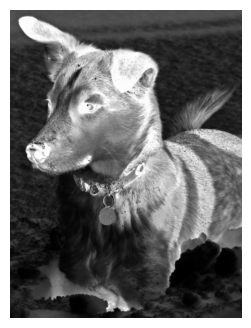

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt 
import numpy as np 
import os 
plt.rcParams['figure.figsize'] = [8, 4]

image = '/workspaces/steve-brunton-book/data/dog.jpg'
A = imread(image)
X = np.mean(A, -1); # convert RGB to grayscale

im = plt.imshow(256-X)
im.set_cmap('gray')
plt.axis('off')
plt.show()

## Compute the economy SVD of the data matrix

In [3]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
Sigma = np.diag(S)  # create diagonal matrix of singular values
V = VT.T     # create V matrix

print(f"X shape: {np.shape(X)}")
print(f"U shape: {np.shape(U)}")
print(f"Sigma shape: {np.shape(Sigma)}")
print(f"V shape: {np.shape(V)}")


X shape: (2000, 1500)
U shape: (2000, 1500)
Sigma shape: (1500, 1500)
V shape: (1500, 1500)


### Plot the results

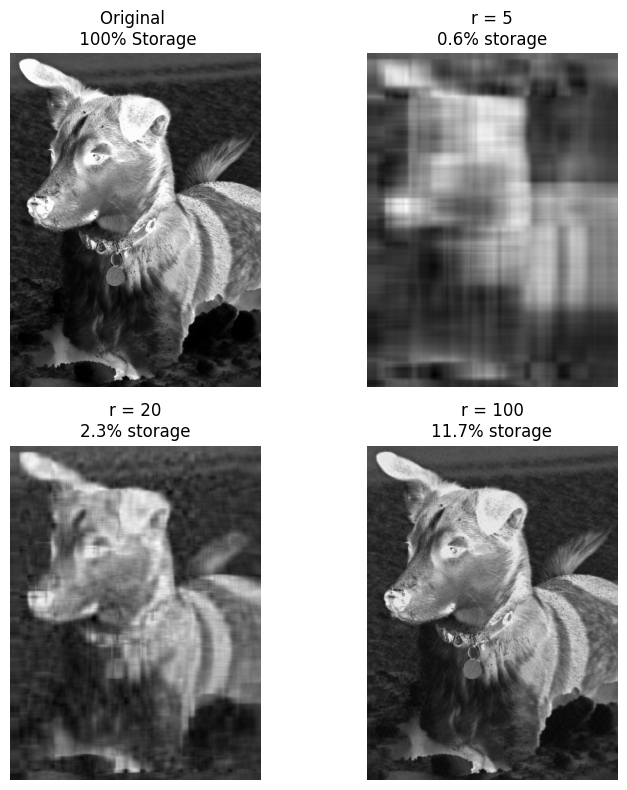

In [4]:
m, n = np.shape(X)
orig_storage = m * n

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

axes[0].imshow(256 - X, cmap="gray")
axes[0].axis('off')
axes[0].set_title(f"Original \n 100% Storage")

for ax, r in zip(axes[1:], [5, 20, 100]):
    Xapprox = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]
    ax.imshow(256 - Xapprox, cmap="gray")
    ax.axis('off')

    approx_storage = m*r + r + n*r
    pct = 100 * approx_storage / orig_storage
    ax.set_title(f"r = {r}\n{pct:.1f}% storage")

# 4) Improve spacing and show once
plt.tight_layout()
plt.show()

## Singular Value Plots

### Plot 1
- $\sigma_r$ vs. $r$

### Plot 2
- $\frac{\sum_{j=1}^{r}{\sigma_j}}{\sum_{j=1}^{m}{\sigma_j}}$ vs. $r$

- `np.cumsum(S)` (numerator) gives an array of values where each index is the cumulative sum of the previous indices.

- `np.sum(S)` (denominator) gives a single value that corresponds with the sum of all the singular values.

💎 Dividing each $\sum_{j=1}^{r}{\sigma_j}$ by the sum of all the singular values normalizes that cumulative sum into a fraction (or percentage) of the full 'energy' of the image



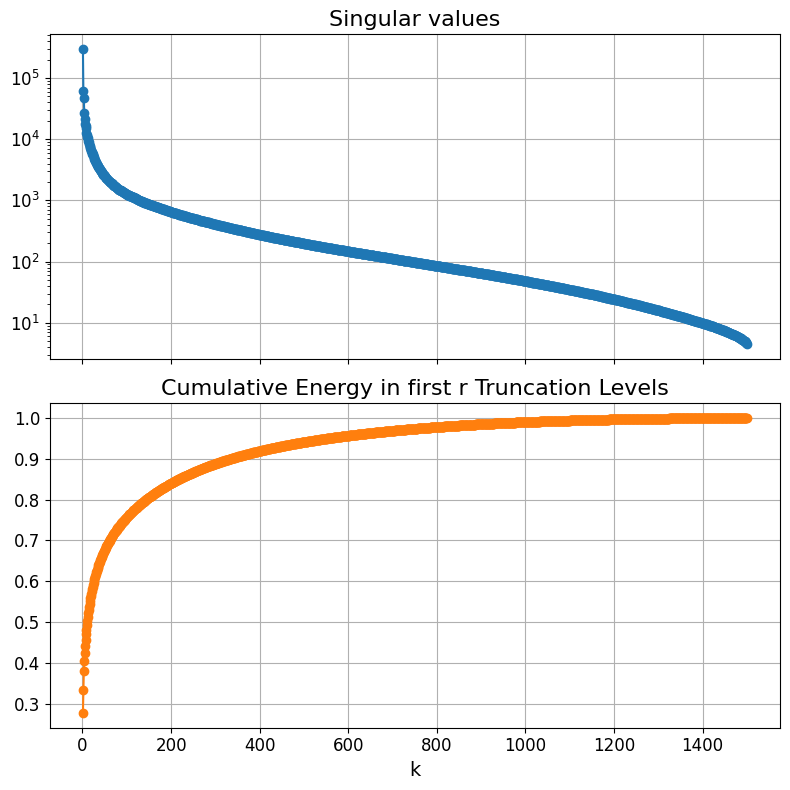

In [6]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
axes = axes.flatten()

r_values = np.arange(1, len(S) + 1)  # Create a range of integers from 1 to the length of S

axes[0].semilogy(r_values, S, '-o', color='C0')
axes[0].set_title('Singular values')
axes[0].grid()

singular_values_cumsum = np.cumsum(S)/np.sum(S)
axes[1].plot(r_values, singular_values_cumsum, '-o', color='C1')
axes[1].set_title('Cumulative Energy in first r Truncation Levels')
axes[1].grid(True)

# now label the shared x-axis
axes[1].set_xlabel('k', fontsize=14)
# bump for all tick labels
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.title.set_fontsize(16)

fig.tight_layout()
plt.show()

#### Plot 1 Results
- Most of the 'energy' is contained in the first 20ish truncation levels.

#### Plot 2 Results 
- About 30% of the 'energy' is contained within the truncation level
- About 70% of the 'energy' is contained within the first 20ish truncation levels